# CS3802--Machine Learning Algorithms Lab

Adithya V |
BTech CSE (IoT) - A | 21011102009

## Exercise 5
---
### Use the teleco-customer-churn dataset for the following:

1. Perform the necessary pre-processings.

2. Apply all the classification algorithms (KNN, Logisitc Regression, Naive Bayes, Decision Trees, SVM) on this dataset and print the accuracies.

3. Find which algorithm gave the best accuracy.

4. Provide a justification as to why that algorithm provided the best accuracy

5. zip the code files and the justification file and attach the zipped folder in the submission page

### Importing the necessary libraries and reading the dataset

In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
import pandas as pd
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Pre-Processing

#### Handle null values by either removing rows or filling with mean/median

The `Handling_NullValues` function takes a DataFrame (`df`) as input and performs the following steps:

1. **Iterate Through Columns:**
   - For each column (`col`) in the DataFrame:
      - Checks the data type of the column (`typeCol = str(df[col].dtype)`).

2. **Handle Null Values for Object Type:**
   - If the column type is 'object' (categorical):
      - Removes rows with null values for that column (`df = df[df[col].notna()]`).

3. **Handle Null Values for Numeric Type:**
   - If the column type is numeric:
      - Calculates mean, median, and standard deviation of the column (`mean = df[col].mean()`, `median = df[col].median()`, `standard_deviation = df[col].std()`).

4. **Partial Median Change (PMC) Criteria:**
   - Calculates Partial Median Change (PMC) using the formula `pmc = (3 * (mean - median)) / standard_deviation`.
   - If PMC is greater than or equal to 0.4 or less than or equal to -0.4:
      - Fills null values with the median (`df[col] = df[col].fillna(median)`).
   - Otherwise:
      - Fills null values with the mean (`df[col] = df[col].fillna(mean)`).

5. **Return Updated DataFrame:**
   - Returns the DataFrame with missing values handled based on data type and PMC criteria.



In [9]:
def Handling_NullValues(df):
   
    columns = df.columns
    for col in columns:
        typeCol = str(df[col].dtype)
        if typeCol == 'object':
            df = df[df[col].notna()]
        else:
            mean = df[col].mean()
            median = df[col].median()
            standard_deviation = df[col].std()
            pmc = (3 * (mean - median)) / standard_deviation
            if pmc >= 0.4 or pmc <= -0.4:
                df[col] = df[col].fillna(median)
            else:
                df[col] = df[col].fillna(mean)
    return df

#### Perform one-hot encoding for categorical columns

The `OneHotEncoding_objects` function encodes categorical (object-type) columns using one-hot encoding:

1. **Iterate Through Columns:**
   - For each column (`col`) in the DataFrame:
      - Check if the column type is 'object'.

2. **One-Hot Encode Object Columns:**
   - If the column is 'object':
      - Use `pd.get_dummies` to create one-hot encoded columns.

3. **Rename and Join Encoded Columns:**
   - Rename the new columns by appending the original column name as a prefix.
   - Join the one-hot encoded columns to the original DataFrame.

4. **Drop Original Object Column:**
   - Drop the original object-type column.

5. **Return Updated DataFrame:**
   - Returns the DataFrame with one-hot encoded object-type columns.

In [10]:
def OneHotEncoding_objects(df):
   
    columns = df.columns
    for col in columns:
        typeCol = str(df[col].dtype)
        if typeCol == 'object':
            enc = pd.get_dummies(df[col])
            encCol = enc.columns
            newColumns = {}
            for i in range(0, len(encCol)):
                newColumns[encCol[i]] = col + encCol[i]
            enc.rename(columns=newColumns, inplace=True)
            df = df.join(enc)
            df = df.drop([col], axis=1)
    return df

In [11]:
df = OneHotEncoding_objects(data)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID0002-ORFBO,customerID0003-MKNFE,customerID0004-TLHLJ,customerID0011-IGKFF,customerID0013-EXCHZ,customerID0013-MHZWF,customerID0013-SMEOE,...,TotalCharges996.85,TotalCharges996.95,TotalCharges997.65,TotalCharges997.75,TotalCharges998.1,TotalCharges999.45,TotalCharges999.8,TotalCharges999.9,ChurnNo,ChurnYes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df1 = OneHotEncoding_objects(Handling_NullValues(data))
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID0002-ORFBO,customerID0003-MKNFE,customerID0004-TLHLJ,customerID0011-IGKFF,customerID0013-EXCHZ,customerID0013-MHZWF,customerID0013-SMEOE,...,TotalCharges996.85,TotalCharges996.95,TotalCharges997.65,TotalCharges997.75,TotalCharges998.1,TotalCharges999.45,TotalCharges999.8,TotalCharges999.9,ChurnNo,ChurnYes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = data_encoded.columns
data_scale = scaler.fit_transform(data_encoded.to_numpy())
data_scale = pd.DataFrame(data_scale, columns=cols)
data_scale.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,-0.439916,-1.277445,-1.160323,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,...,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,0.601023,-0.601023
1,-0.439916,0.066327,-0.259629,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,...,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,0.601023,-0.601023
2,-0.439916,-1.236724,-0.362660,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,...,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-1.663829,1.663829
3,-0.439916,0.514251,-0.746535,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,...,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,0.601023,-0.601023
4,-0.439916,-1.236724,0.197365,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,...,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-0.011917,-1.663829,1.663829


In [ ]:
df1 = df

In [15]:
data_scale['Churn'] = data['Churn']

### Model Training

In [17]:
target = data_scale['Churn']
ivCol = list(data_scale.columns)
ivCol.remove('Churn')
independent_variables = data_scale[ivCol]
independent_variables
x_train, x_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.3,random_state=6789,shuffle=True)

### Logistic Regression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logistic_pred = logisticRegr.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.975390440132513


### K-Nearest Neighbors

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.873639375295788


### Naive Bayes

In [ ]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
nb_pred = naive_bayes.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.9725508755324184


### Decision Trees

In [18]:
# Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Trees Accuracy:", dt_accuracy)

Decision Trees Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree, x_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9981069569332702


### Support Vector Machines (SVM)

In [ ]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7884524372929484


### Comparison

Logistic Regression Accuracy: 0.975390440132513
K-Nearest Neighbors Accuracy: 0.873639375295788
Naive Bayes Accuracy: 0.9725508755324184
Decision Trees Accuracy: 1.0
SVM Accuracy: 0.7884524372929484


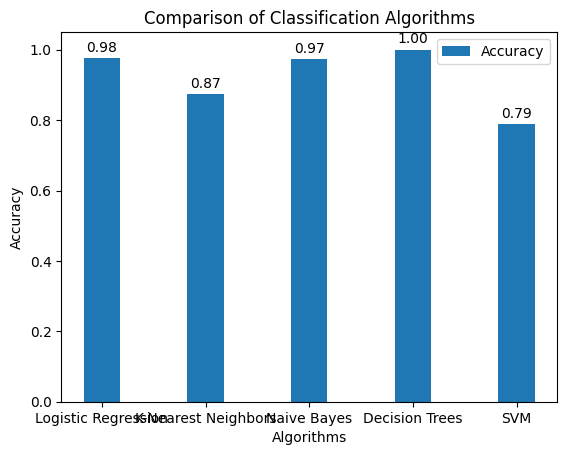

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store the accuracies in a dictionary
accuracies = {
    'Logistic Regression': logistic_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Decision Trees': dt_accuracy,
    'SVM': svm_accuracy
}

# Print accuracies
for algo, accuracy in accuracies.items():
    print(f"{algo} Accuracy: {accuracy}")

# Plotting the accuracies
fig, ax = plt.subplots()
algos = list(accuracies.keys())
accuracy_values = list(accuracies.values())

bar_width = 0.35
index = np.arange(len(algos))

bar_plot = ax.bar(index, accuracy_values, bar_width, label='Accuracy')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Classification Algorithms')
ax.set_xticks(index)
ax.set_xticklabels(algos)
ax.legend()

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()
